In [128]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
import os
import sys
import pathlib
import itertools as it
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import fmin_cg

mod_path = os.path.abspath(os.path.join('..', '..', '..'))
if mod_path not in sys.path:
    sys.path.insert(0, mod_path)

from ex8.python.libs import *

In [130]:
mpl.rcParams['figure.dpi'] = 150

# Recommender Systems

in matrix $R$ stores if user i has rated movie j, $R_{ji} \in \{0, 1\}$

in matrix $Y$ stores the rating of user i to movie j, $Y_{ji} \in \{0,1,2,3,4,5\}$, and 0 means no rating for the movie

In [131]:
data = sio.loadmat('../../data/ex8_movies.mat')
R = data['R']
Y = data['Y']

In [132]:
print(f'Average rating for movie 1 (Toy Story): {Y[0, R[0]>0].mean():f} / 5')

Average rating for movie 1 (Toy Story): 3.878319 / 5


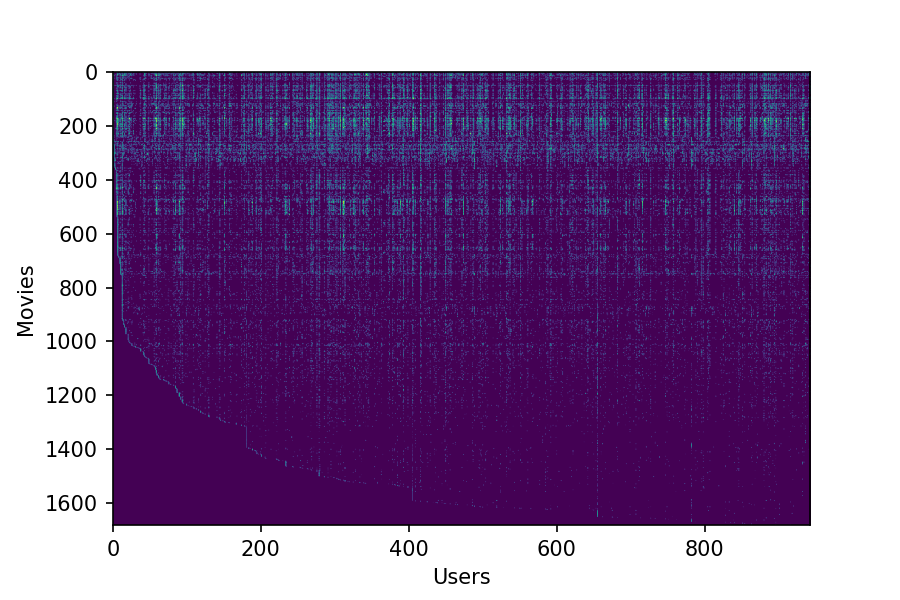

In [133]:
fig, ax = plt.subplots()
ax.imshow(Y)
ax.set(
    ylabel='Movies',
    xlabel='Users'
)
ax.set_aspect('auto')

## Collaborative Filtering Cost function

In [134]:
data = sio.loadmat('../../data/ex8_movieParams.mat')
X = data['X']
Theta = data['Theta']
num_users = data['num_users']
num_movies = data['num_movies']
num_features = data['num_features']

In [135]:
num_users = 4
num_movies= 5
num_features = 3
X = X[:num_movies, :num_features]
Theta = Theta[:num_users, :num_features]
Y = Y[:num_movies, :num_users]
R = R[:num_movies, :num_users]

In [136]:
J = cofi_cost_fn(
    np.hstack((X.ravel(), Theta.ravel())), Y, R,
    num_users, num_movies, num_features,
    0
)
print(f'''Cost at loaded parameters: {J:f}
(this value should be about 22.22)
''')

Cost at loaded parameters: 22.224604
(this value should be about 22.22)



# Gradient

In [137]:
check_cost_fn(0)

-6.473413e-01	-6.473413e-01
-1.566120e-01	-1.566120e-01
-2.814544e-01	-2.814544e-01
0.000000e+00	0.000000e+00
0.000000e+00	0.000000e+00
0.000000e+00	0.000000e+00
6.714728e-01	6.714728e-01
8.576091e-02	8.576091e-02
2.977096e-01	2.977096e-01
6.572046e-02	6.572046e-02
3.079742e-01	3.079742e-01
4.595719e-01	4.595719e-01
2.162901e-01	2.162901e-01
3.110466e-01	3.110466e-01
5.098057e-01	5.098057e-01
-7.595976e-02	-7.595976e-02
-4.119049e-01	-4.119049e-01
-1.125806e-01	-1.125806e-01
5.442183e-01	5.442183e-01
5.910706e-01	5.910706e-01
3.444547e-01	3.444547e-01
0.000000e+00	0.000000e+00
0.000000e+00	0.000000e+00
0.000000e+00	0.000000e+00
The above two columns you get should be very similar.
        (Left-Your Numerical Gradient, Right-Analytical Gradient)
    
If your backpropagation implementation is correct, then 
        the relative difference will be small (less than 1e-9).
        Relative Difference: 4.204268e-13
    


In [138]:
J = cofi_cost_fn(
    np.hstack((X.ravel(), Theta.ravel())), Y, R,
    num_users, num_movies, num_features,
    1.5
)
print(f'''Cost at loaded parameters (lambda = 1.5): {J:f}
(this value should be about 31.34)
''')

Cost at loaded parameters (lambda = 1.5): 31.344056
(this value should be about 31.34)



In [139]:
check_cost_fn(1.5)

9.412882e-01	9.412882e-01
6.866943e-01	6.866943e-01
1.528348e-01	1.528348e-01
-5.216352e-01	-5.216352e-01
3.478858e-01	3.478858e-01
8.082154e-02	8.082154e-02
1.332342e+00	1.332342e+00
1.183372e+00	1.183372e+00
8.274338e-01	8.274338e-01
1.252045e+00	1.252045e+00
2.507806e+00	2.507806e+00
1.755153e+00	1.755153e+00
7.297020e-01	7.297020e-01
1.910666e-01	1.910666e-01
5.891740e-01	5.891740e-01
1.155403e+00	1.155403e+00
2.054634e+00	2.054634e+00
1.769645e+00	1.769645e+00
4.663191e-01	4.663191e-01
-3.313258e-01	-3.313258e-01
-3.575992e-01	-3.575992e-01
7.119501e-01	7.119501e-01
1.506449e+00	1.506449e+00
7.215594e-01	7.215594e-01
The above two columns you get should be very similar.
        (Left-Your Numerical Gradient, Right-Analytical Gradient)
    
If your backpropagation implementation is correct, then 
        the relative difference will be small (less than 1e-9).
        Relative Difference: 1.761779e-12
    


## Entering rating for a new user

In [140]:
movie_list = load_movie_list('../../data/movie_ids.txt')

In [141]:
my_rating_map = {
    0: 4,
    97: 2,
    6: 3,
    11: 5,
    53: 4,
    63: 5,
    65: 3,
    68: 5,
    182: 4,
    225: 5,
    354: 5
}
my_ratings = np.zeros(len(movie_list))

print('New user ratings:')
for idx, rating in my_rating_map.items():
    my_ratings[idx] = rating
    print(f'Rated {rating} for {movie_list[idx]}')

New user ratings:
Rated 4 for Toy Story (1995)
Rated 2 for Silence of the Lambs, The (1991)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
Rated 5 for Sphere (1998)


## Learing movie ratings

In [176]:
data = sio.loadmat('../../data/ex8_movies.mat')
Y = data['Y']
R = data['R']

In [177]:
# Y = np.hstack((my_ratings[np.newaxis].T, Y))
# R = np.hstack((my_ratings[np.newaxis].T != 0, R))
Y = np.hstack((my_ratings.reshape((-1, 1)), Y))
R = np.hstack((my_ratings.reshape((-1, 1)) != 0, R))

In [178]:
Ynorm, Ymean = normalize_ratings(Y, R)

In [179]:
num_movies, num_users = Y.shape
num_features = 10

In [180]:
X = np.random.random((num_movies, num_features))
Theta = np.random.random((num_users, num_features))
initial_parameters = np.hstack((X.ravel(), Theta.ravel()))

In [181]:
lb = 10
theta = fmin_cg(cofi_cost_fn, initial_parameters, cofi_grad_fn, args=(Ynorm, R, num_users, num_movies, num_features, lb), maxiter=100)
X = theta[:num_movies*num_features].reshape((num_movies, num_features))
Theta = theta[num_movies*num_features:].reshape((num_users, num_features))
print('Recommender system learning completed.')

         Current function value: 38955.569884
         Iterations: 100
         Function evaluations: 148
         Gradient evaluations: 148
Recommender system learning completed.


## Recommendation for you

In [182]:
p = X @ Theta.T + Ymean.reshape(-1, 1)
my_predictions = p[:, 0]

In [183]:
print('Original ratings provided')
for idx, rating in my_rating_map.items():
    print(f'Rated {rating} for {movie_list[idx]}')

Original ratings provided
Rated 4 for Toy Story (1995)
Rated 2 for Silence of the Lambs, The (1991)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
Rated 5 for Sphere (1998)


In [184]:
topk = 15
ix = np.flip(np.argsort(my_predictions))[:topk]
print(f'Top {topk} recommendation for you')
for j in ix:
    print(f'Predicting rating {my_predictions[j]:.1f} for movie {movie_list[j]}')

Top 15 recommendation for you
Predicting rating 5.0 for movie Marlene Dietrich: Shadow and Light (1996) 
Predicting rating 5.0 for movie Someone Else's America (1995)
Predicting rating 5.0 for movie Star Kid (1997)
Predicting rating 5.0 for movie Saint of Fort Washington, The (1993)
Predicting rating 5.0 for movie Entertaining Angels: The Dorothy Day Story (1996)
Predicting rating 5.0 for movie Prefontaine (1997)
Predicting rating 5.0 for movie They Made Me a Criminal (1939)
Predicting rating 5.0 for movie Aiqing wansui (1994)
Predicting rating 5.0 for movie Santa with Muscles (1996)
Predicting rating 5.0 for movie Great Day in Harlem, A (1994)
Predicting rating 4.6 for movie Pather Panchali (1955)
Predicting rating 4.6 for movie Star Wars (1977)
Predicting rating 4.6 for movie Shawshank Redemption, The (1994)
Predicting rating 4.5 for movie Maya Lin: A Strong Clear Vision (1994)
Predicting rating 4.5 for movie Wrong Trousers, The (1993)


In [185]:
for idx, rating in my_rating_map.items():
    diff = my_predictions[idx] - rating
    print(f'predict {my_predictions[idx]:f}, I rated {rating}, diff={diff:f} for movie {idx} {movie_list[idx]}')

predict 4.008447, I rated 4, diff=0.008447 for movie 0 Toy Story (1995)
predict 4.169062, I rated 2, diff=2.169062 for movie 97 Silence of the Lambs, The (1991)
predict 3.755336, I rated 3, diff=0.755336 for movie 6 Twelve Monkeys (1995)
predict 4.418941, I rated 5, diff=-0.581059 for movie 11 Usual Suspects, The (1995)
predict 3.440548, I rated 4, diff=-0.559452 for movie 53 Outbreak (1995)
predict 4.567715, I rated 5, diff=-0.432285 for movie 63 Shawshank Redemption, The (1994)
predict 3.632390, I rated 3, diff=0.632390 for movie 65 While You Were Sleeping (1995)
predict 4.128119, I rated 5, diff=-0.871881 for movie 68 Forrest Gump (1994)
predict 4.051261, I rated 4, diff=0.051261 for movie 182 Alien (1979)
predict 3.637591, I rated 5, diff=-1.362409 for movie 225 Die Hard 2 (1990)
predict 3.074074, I rated 5, diff=-1.925926 for movie 354 Sphere (1998)


List Top K related movies

the distance of movie $i$ and $j$ is defined as

$d_{ji} = \|x^{(i)} - x^{(j)}\|$

In [186]:
topk = 15
base_movie = 545
related_movies = topk_related_movies(X, base_movie, topk)
print(f'Top {topk} movies related to {movie_list[base_movie]}\n')

for idx in related_movies:
    print(f'({idx}) {movie_list[idx]}')

Top 15 movies related to Broken Arrow (1996)

(225) Die Hard 2 (1990)
(1046) Multiplicity (1996)
(290) Absolute Power (1997)
(596) Eraser (1996)
(404) Mission: Impossible (1996)
(801) Hard Target (1993)
(741) Ransom (1996)
(840) Glimmer Man, The (1996)
(565) Clear and Present Danger (1994)
(119) Striptease (1996)
(848) Days of Thunder (1990)
(26) Bad Boys (1995)
(1138) Hackers (1995)
(807) Program, The (1993)
(232) Under Siege (1992)
